# BNB implementation with all possible data 

In [1]:
# imports
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
import importlib.util
spec = importlib.util.spec_from_file_location("module.name", "../functions.py")
functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(functions)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

# param values
grid_params_nn = {
  'alpha': np.linspace(0.0, 1.5, 20),
  'fit_prior': [True, False],
}

## BNB with just using default values

In [2]:
# get data
X, y = functions.get_data(standard=True, normal=False)
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [3]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [4]:
# predict test values
y_pred_basic = bnb.predict(X_test)

In [5]:
# calculate F1 score
f1_basic = f1_score(y_test, y_pred_basic)
"F1 score is = {0}".format(f1_basic)

'F1 score is = 0.0'

In [6]:
# creating KNN instance
bnb = BernoulliNB()
bnbCV = RandomizedSearchCV(bnb, grid_params_nn, cv=10, scoring='f1', n_iter=700, verbose=10, n_jobs=-1)

bnbCV.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 40 is smaller than n_iter=700. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.2000s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 298 tasks      | elap

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
          fit_params=None, iid='warn', n_iter=700, n_jobs=-1,
          param_distributions={'alpha': array([0.     , 0.07895, 0.15789, 0.23684, 0.31579, 0.39474, 0.47368,
       0.55263, 0.63158, 0.71053, 0.78947, 0.86842, 0.94737, 1.02632,
       1.10526, 1.18421, 1.26316, 1.34211, 1.42105, 1.5    ]), 'fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=10)

In [7]:
bnb = bnbCV.best_estimator_
bnb.fit(X_train, y_train.values.ravel())
# predict test values
y_pred_basic = bnb.predict(X_test)

In [8]:
# calculate F1 score
f1_basic = f1_score(y_test, y_pred_basic)
"F1 score is = {0}".format(f1_basic)

'F1 score is = 0.33199260789216223'

## BNB with removed outliers

In [9]:
# get data
X, y = functions.get_data(type="__removeoutliers")
# split dataset into train and test data
X_train, X_test, y_train, y_test_outliers = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [10]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [11]:
# predict test values
y_pred_outliers = bnb.predict(X_test)

In [12]:
# calculate F1 score
# calculate F1 score
f1_outliers = f1_score(y_test_outliers, y_pred_outliers)
"F1 score is = {0}".format(f1_outliers)

'F1 score is = 0.0014556040756914118'

In [13]:
# write result to file
f = open("../results/files/bnb_results_new.txt", "a")
f.write("Basic Bernoulli NaiveBayes without outliers: F1 score = {0} \n".format(f1_outliers))
f.close()

In [14]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_outliers, columns=["y_pred"])

result['y_test'] = y_test_outliers["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_basic_removed_outliers_new.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,1.0,-0.404811,-1.617447,-0.752941,1.158994,0.531721,-0.384661,0.146137,-0.856641,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,3.870001,-0.00884,-0.054211,-0.033680,-0.034823
1,0.0,0.0,-0.402989,0.618258,-0.177342,-0.626663,1.086777,-0.950840,-0.316432,-0.207042,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,-0.033680,-0.034823
2,0.0,0.0,-0.412274,-1.617447,-0.321242,-0.555254,1.086777,0.028601,0.377421,1.045756,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,3.870001,-0.00884,-0.054211,-0.033680,-0.034823
3,0.0,0.0,-0.410205,0.618258,1.009831,-0.596835,1.086777,-0.192863,-0.369806,-1.088641,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,-0.033680,-0.034823
4,0.0,0.0,-0.410369,0.618258,0.362282,-0.087699,-0.855918,0.004805,-0.138521,-0.253442,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,3.870001,-0.00884,-0.054211,-0.033680,-0.034823
5,0.0,0.0,-0.407786,0.618258,0.074483,-0.871797,-1.688501,-0.394528,-0.031774,-0.485442,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,-0.033680,-0.034823
6,0.0,0.0,2.465387,0.618258,1.153731,-1.652697,-0.855918,-1.126079,0.679870,1.324155,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,-0.033680,-0.034823
7,0.0,0.0,-0.410386,0.618258,0.829956,-0.349760,1.086777,0.147791,2.227697,-0.160642,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,-0.033680,-0.034823
8,0.0,1.0,-0.413293,0.618258,0.686056,-1.351104,-0.300862,-0.702508,2.672475,0.767356,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,29.691517,-0.034823
9,0.0,1.0,-0.412124,0.618258,1.045806,-1.648995,-1.410973,-0.828957,-1.241570,-0.763841,...,-0.110726,-0.178927,-0.07981,-0.056693,-0.039065,-0.258398,-0.00884,-0.054211,-0.033680,-0.034823


## BNB with PCA features

In [15]:
# get data
X, y = functions.get_data(type="__PCA")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [16]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
# predict test values
y_pred_PCA = bnb.predict(X_test)

In [18]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.9137931034482759'

In [19]:
# write result to file
f = open("../results/files/bnb_results_new.txt", "a")
f.write("Basic Bernoulli NaiveBayes with PCA features: F1 score = {0} \n".format(f1_PCA))
f.close()

In [20]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_PCA, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_PCA_features_new.csv")

result.head(20)

,y_pred,y_test,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,-0.412577,0.073798,0.302245,1.152533,1.591901,-0.796237,0.904045,0.203405,...,3.257358,-0.130967,0.203714,0.064874,-0.054225,-0.003557,0.035267,-0.011648,-0.099179,0.056109
1,0.0,0.0,2.451204,-0.053498,-0.008346,-0.455600,1.250931,-0.432908,-0.885478,-1.141452,...,-0.264713,0.001996,0.146975,-0.010840,-0.029232,0.002380,-0.045281,0.046749,0.079399,-0.028884
2,0.0,0.0,2.451203,-0.086665,-0.193717,-0.462753,1.089282,0.586026,1.003910,-0.737614,...,3.268107,-0.025978,0.224817,-0.002353,-0.063698,-0.085217,0.016115,-0.023169,-0.106136,0.056399
3,0.0,0.0,2.451196,0.079218,-0.497684,0.975842,0.796671,0.412962,0.085914,0.713404,...,-0.321066,0.221062,0.179404,1.333903,2.740947,0.970652,-4.182014,6.839219,-2.433925,-0.675655
4,0.0,0.0,2.451204,-0.013222,0.112871,-0.376626,-1.244614,-0.399605,0.962043,-1.587003,...,-0.559785,-1.546100,-0.169235,1.312926,5.245732,-1.879492,4.723097,-0.279735,-1.065799,-0.324880
5,0.0,0.0,-0.411330,0.058962,-0.716016,1.429754,-0.679316,-0.534569,-0.447755,-0.214454,...,-0.152091,0.588374,0.096506,0.044338,0.025436,4.077419,0.984857,-0.085814,0.080323,0.012528
6,0.0,0.0,-0.409601,-0.067677,-0.798848,-0.528948,0.037518,0.457051,-0.601835,-0.218698,...,-0.351426,0.148343,-0.237947,-0.197738,-0.050648,-0.080094,0.021740,-0.012013,-0.049836,-0.005587
7,0.0,0.0,-0.404266,-0.043323,0.401436,-0.446377,1.750826,0.670474,0.058356,0.193197,...,-0.365541,0.032762,-0.224000,-0.189054,-0.064560,-0.012468,0.034465,0.002155,-0.049178,-0.017546
8,0.0,0.0,-0.413778,-0.050528,-0.476588,-0.381175,-0.955574,0.647986,-0.023663,-0.218931,...,-0.276312,0.242121,-2.613213,-1.379083,-0.607759,-0.121671,0.201659,-0.022799,-0.138329,-0.051835
9,0.0,0.0,-0.414293,-0.069884,-1.085907,-0.310465,-0.552059,-1.121327,-0.842424,-0.278187,...,-0.327325,0.146409,-0.234286,-0.195380,-0.047067,-0.073636,0.047448,-0.014542,-0.048469,-0.005846


## BNB with feature tools features

In [21]:
# get data
X, y = functions.get_data(type="__FTs")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [22]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [23]:
# predict test values
y_pred_FT = bnb.predict(X_test)

In [24]:
# calculate F1 score
f1_FT = f1_score(y_test, y_pred_FT)
"F1 score is = {0}".format(f1_FT)

'F1 score is = 0.3110720562390158'

In [25]:
# write result to file
f = open("../results/files/bnb_results_new.txt", "a")
f.write("Basic Bernoulli NaiveBayes with FT features: F1 score = {0} \n".format(f1_FT))
f.close()

In [26]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_FT, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_FT_features_new.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Current Loan Amount / Purpose_vacation,Current Loan Amount / Purpose_Educational Expenses,Current Loan Amount / Purpose_major_purchase,Current Loan Amount + Term,Current Loan Amount / Purpose_moving,Current Loan Amount / Home Ownership_HaveMortgage,Current Loan Amount / Purpose_Buy House,1 / Current Loan Amount,Current Loan Amount / Purpose_wedding,Credit Score + Current Loan Amount,Current Loan Amount / Purpose_Take a Trip,0 - Current Loan Amount,Current Loan Amount / Purpose_renewable_energy,Current Loan Amount / Purpose_small_business
0,1.0,0.0,-0.412579,0.412731,0.412749,0.413343,0.148487,0.412682,0.413226,0.414161,-0.379885,0.412730,0.062905,0.414096,0.412579,0.412631,0.413117
1,0.0,0.0,2.451202,-2.453014,-2.452467,-2.454616,0.589836,-2.454383,-2.453324,-2.459379,2.450130,-2.453014,2.084437,-2.457243,-2.451202,-2.451179,-2.455260
2,0.0,0.0,2.451202,-2.453014,-2.452467,-2.454616,2.102829,-2.454383,-2.453324,-2.459379,2.450130,-2.453014,1.355117,-2.457243,-2.451202,-2.451179,-2.455260
3,0.0,0.0,2.451202,-2.453014,-2.452467,-2.454616,2.102829,-2.454383,-2.453324,-2.459379,2.450130,-2.453014,1.519802,-2.457243,-2.451202,-2.451179,-2.455260
4,0.0,0.0,2.451202,-2.453014,-2.452467,-2.454616,2.102829,-2.454383,-2.453324,-2.459379,2.450130,-2.453014,2.131490,-2.457243,-2.451202,-2.451179,-2.455260
5,1.0,0.0,-0.411322,0.411473,0.411492,0.412084,0.149345,0.411424,0.411968,0.412900,-0.387288,0.411472,0.087267,0.412836,0.411322,0.411374,0.411858
6,1.0,0.0,-0.409595,0.409745,0.409764,0.410355,-1.362469,0.409695,0.410239,0.411167,-0.397532,0.409744,-0.570325,0.411104,0.409595,0.409647,0.410129
7,1.0,0.0,-0.404271,0.404418,0.404437,0.405023,-1.358836,0.404365,0.404910,0.405825,-0.429664,0.404417,-0.849104,0.405766,0.404271,0.404323,0.404796
8,1.0,0.0,-0.413774,0.413928,0.413946,0.414540,0.147671,0.413879,0.414423,0.415361,-0.372885,0.413927,-0.667210,0.415295,0.413774,0.413826,0.414315
9,1.0,0.0,-0.414284,0.414437,0.414455,0.415050,0.147324,0.414389,0.414933,0.415872,-0.369917,0.414436,0.508775,0.415806,0.414284,0.414336,0.414825


## BNB with polynominal features

In [27]:
# get data
X, y = functions.get_data(type="__polynomial")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [28]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
# predict test values
y_pred_poly = bnb.predict(X_test)

In [30]:
# calculate F1 score
f1_poly = f1_score(y_test, y_pred_poly)
"F1 score is = {0}".format(f1_poly)

'F1 score is = 0.26530031312268715'

In [31]:
# write result to file
f = open("../results/files/bnb_results_new.txt", "a")
f.write("Basic Bernoulli NaiveBayes with polynomial features: F1 score = {0} \n".format(f1_poly))
f.close()

In [32]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_poly, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/bnb_prediction_polynomial_features_new.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Income,Credit Ration per Year,Current Loan Amount^2,Current Loan Amount Credit Ration per Year,Term^2,Term Credit Score,Credit Score^2,Annual Income Credit Ration per Year,Monthly Debt Credit Ration per Year,Monthly Income Credit Ration per Year,Credit Ration per Year^2
0,0.0,0.0,-0.412579,0.630163,0.507199,0.253544,-0.014941,-0.361192,-0.406114,-0.338209,-0.630163,-0.139132,-0.373219,0.035719,-0.584758,0.154481,-0.205307
1,0.0,0.0,2.451202,-1.586890,0.684137,0.041248,-0.101225,1.564749,2.451228,1.379667,1.586890,-1.363049,-0.267299,0.228340,1.640461,-0.058231,0.341991
2,0.0,0.0,2.451202,0.630163,-0.412882,-0.145326,-0.263649,1.814986,2.451228,1.665498,-0.630163,-0.644109,-0.416824,-0.176724,1.399939,-0.473981,0.541678
3,0.0,0.0,2.451202,0.630163,-0.165168,-0.499058,-0.639564,2.525859,2.451228,2.477485,-0.630163,-0.508154,-0.488775,-1.406553,1.771668,-1.950517,1.270264
4,0.0,0.0,2.451202,0.630163,0.754913,0.159315,0.344998,1.434078,2.451228,1.230409,-0.630163,-0.003177,-0.216121,0.430594,-1.534443,0.790010,0.249469
5,0.0,0.0,-0.411322,0.630163,0.542587,-0.776112,-0.741846,-0.356151,-0.406620,-0.339387,-0.630163,-0.119710,-0.354552,0.489746,0.352853,0.490602,-0.206161
6,1.0,0.0,-0.409595,-1.586890,-0.448269,-0.784181,-0.756705,-0.353713,-0.407314,-0.340139,1.586890,0.202050,-0.401511,0.490932,0.336800,0.495078,-0.206570
7,0.0,0.0,-0.404271,-1.586890,-0.872922,0.412367,0.193356,-0.356853,-0.409435,-0.340425,1.586890,0.788962,-0.119595,-0.032851,-0.490518,0.057862,-0.206043
8,0.0,0.0,-0.413774,0.630163,-0.589820,-0.468665,-0.319006,-0.360667,-0.405630,-0.338109,-0.630163,-0.741220,-0.327675,0.357259,0.571080,0.296895,-0.205397
9,0.0,0.0,-0.414284,0.630163,1.179565,-1.080179,-0.980415,-0.357954,-0.405424,-0.338548,-0.630163,0.229889,0.196659,0.625761,0.572287,0.603243,-0.205857


In [33]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


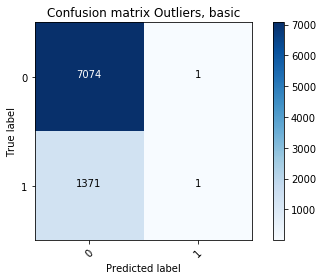

Confusion matrix, without normalization


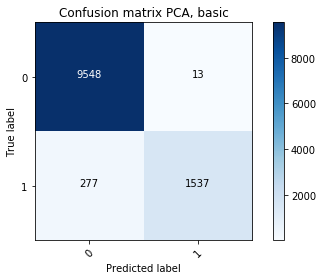

Confusion matrix, without normalization


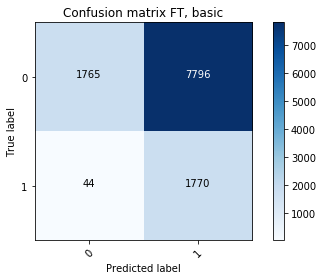

Confusion matrix, without normalization


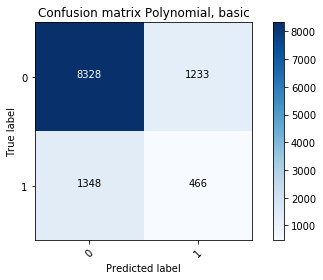

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm_outliers = confusion_matrix(y_test_outliers, y_pred_outliers)
cm_PCA = confusion_matrix(y_test, y_pred_PCA)
cm_FT = confusion_matrix(y_test, y_pred_FT)
cm_poly = confusion_matrix(y_test, y_pred_poly)


np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cm_outliers, classes=['0','1'],
                      title='Confusion matrix Outliers, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_PCA, classes=['0','1'],
                      title='Confusion matrix PCA, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_FT, classes=['0','1'],
                      title='Confusion matrix FT, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_poly, classes=['0','1'],
                      title='Confusion matrix Polynomial, basic')
plt.show()

## Hyper-Parameter tuning on the best results

In [35]:
# load data
# get data
X, y = functions.get_data(type="__PCA")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [36]:
# creating KNN instance
bnb = BernoulliNB()
bnbCV = RandomizedSearchCV(bnb, grid_params_nn, cv=10, scoring='f1', verbose=10, n_jobs=-1)

bnbCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0941s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'alpha': array([0.     , 0.07895, 0.15789, 0.23684, 0.31579, 0.39474, 0.47368,
       0.55263, 0.63158, 0.71053, 0.78947, 0.86842, 0.94737, 1.02632,
       1.10526, 1.18421, 1.26316, 1.34211, 1.42105, 1.5    ]), 'fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=10)

In [37]:
# print results

best_score = bnbCV.best_score_

best_params = bnbCV.best_params_

print("Best score: {0}".format(best_score))
print("Best params: {0}".format(best_params))

f = open("../results/files/bnb_tuning_results_new.txt", "w+")

f.write("Best score = {0} \n".format(best_score))
f.write("Best params = {0} \n".format(best_params))

f.close()

Best score: 0.9762184617056605
Best params: {'fit_prior': False, 'alpha': 0.15789473684210525}


## Run with best results again

In [38]:
# create KNN instance
bnb = BernoulliNB(alpha=0.3157894736842105, binarize=0.0, class_prior=None, fit_prior=True)
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=0.3157894736842105, binarize=0.0, class_prior=None,
      fit_prior=True)

In [39]:
y_pred_PCA = bnb.predict(X_test)

In [40]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.9137931034482759'

In [44]:
f = open("../results/files/bnb_results_final_new.txt", "w+")
f.write("Basic Bernoulli NaiveBayes with PCA features: F1 score = {0} \n".format(f1_PCA))
f.close()

In [45]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_PCA, columns=["y_pred"])
result['y_test'] = y_test["Loan Status"].values
result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
result = pd.concat([result, X_test], axis=1)
result.to_csv("../results/datasets/bnb_prediction_final_new.csv")
result.head(20)

,y_pred,y_test,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,-0.412577,0.073798,0.302245,1.152533,1.591901,-0.796237,0.904045,0.203405,...,3.257358,-0.130967,0.203714,0.064874,-0.054225,-0.003557,0.035267,-0.011648,-0.099179,0.056109
1,0.0,0.0,2.451204,-0.053498,-0.008346,-0.455600,1.250931,-0.432908,-0.885478,-1.141452,...,-0.264713,0.001996,0.146975,-0.010840,-0.029232,0.002380,-0.045281,0.046749,0.079399,-0.028884
2,0.0,0.0,2.451203,-0.086665,-0.193717,-0.462753,1.089282,0.586026,1.003910,-0.737614,...,3.268107,-0.025978,0.224817,-0.002353,-0.063698,-0.085217,0.016115,-0.023169,-0.106136,0.056399
3,0.0,0.0,2.451196,0.079218,-0.497684,0.975842,0.796671,0.412962,0.085914,0.713404,...,-0.321066,0.221062,0.179404,1.333903,2.740947,0.970652,-4.182014,6.839219,-2.433925,-0.675655
4,0.0,0.0,2.451204,-0.013222,0.112871,-0.376626,-1.244614,-0.399605,0.962043,-1.587003,...,-0.559785,-1.546100,-0.169235,1.312926,5.245732,-1.879492,4.723097,-0.279735,-1.065799,-0.324880
5,0.0,0.0,-0.411330,0.058962,-0.716016,1.429754,-0.679316,-0.534569,-0.447755,-0.214454,...,-0.152091,0.588374,0.096506,0.044338,0.025436,4.077419,0.984857,-0.085814,0.080323,0.012528
6,0.0,0.0,-0.409601,-0.067677,-0.798848,-0.528948,0.037518,0.457051,-0.601835,-0.218698,...,-0.351426,0.148343,-0.237947,-0.197738,-0.050648,-0.080094,0.021740,-0.012013,-0.049836,-0.005587
7,0.0,0.0,-0.404266,-0.043323,0.401436,-0.446377,1.750826,0.670474,0.058356,0.193197,...,-0.365541,0.032762,-0.224000,-0.189054,-0.064560,-0.012468,0.034465,0.002155,-0.049178,-0.017546
8,0.0,0.0,-0.413778,-0.050528,-0.476588,-0.381175,-0.955574,0.647986,-0.023663,-0.218931,...,-0.276312,0.242121,-2.613213,-1.379083,-0.607759,-0.121671,0.201659,-0.022799,-0.138329,-0.051835
9,0.0,0.0,-0.414293,-0.069884,-1.085907,-0.310465,-0.552059,-1.121327,-0.842424,-0.278187,...,-0.327325,0.146409,-0.234286,-0.195380,-0.047067,-0.073636,0.047448,-0.014542,-0.048469,-0.005846


Confusion matrix, without normalization


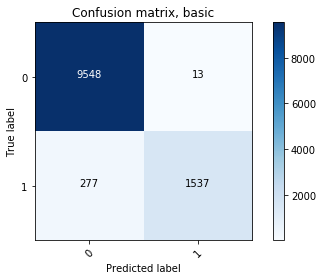

In [46]:
cm_final = confusion_matrix(y_test, y_pred_PCA)

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_final, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

In [52]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall_score = recall_score(y_test, y_pred_PCA, average='weighted')
precision_score = precision_score(y_test, y_pred_PCA, average='weighted')
average_precision = average_precision_score(y_test, y_pred_PCA)

print('Average recall score: {0:0.2f}'.format(
      recall_score))
print('Average precision score: {0:0.2f}'.format(
      precision_score))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

f = open("../results/files/bnb_results_final_new.txt", "w+")
f.write("Basic Bernoulli NaiveBayes with PCA features: Average recall score: {0:0.2f}".format(
      recall_score))
f.write("Basic Bernoulli NaiveBayes with PCA features: Average precision score: {0:0.2f}".format(
      precision_score))
f.write("Basic Bernoulli NaiveBayes with PCA features: Average precision-recall score: {0:0.2f}".format(
      average_precision))
f.close()

Average recall score: 0.97
Average precision score: 0.97
Average precision-recall score: 0.86


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

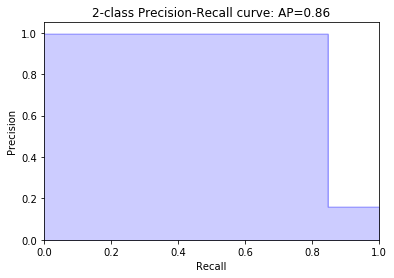

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_PCA)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))